# 1.3 Algoritmos de agrupamiento (clustering)

## 1.3.1 Ejemplo de aplicación

Una empresa de juegos en línea está analizando el comportamiento de sus clientes con el fin de ofrecerles los productos y características más adecuados a sus intereses. En este estudio se miden dos características: número de horas diarias jugando y número de horas diarias charlando (chateando) con otros jugadores, ambas en valor promedio para cada jugador. Los objetivos son dos: El primero, determinar qué tipos o clases de jugadores existen, según su actividad; el segundo, clasificar a los nuevos jugadores en alguna de esas clases para poder ofrecerles las condiciones y productos más adecuados.

Para mostrar la ejecución paso a paso de algunos algoritmos de agrupamiento utilizaremos datos sintéticos (generados artificialmente) con el propósito de que ilustren más claramente los métodos que se expondrán a continuación.

In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame({
    'Jugador': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'Horas juego': [0.5, 1., 0.5, 1., 2.5, 3.5, 4.5, 4.],
    'Horas chat': [4.5, 4., 2., 1.5, 2., 3.5, 2.5, 1.],
})

data

,Jugador,Horas juego,Horas chat
0,A,0.5,4.5
1,B,1.0,4.0
2,C,0.5,2.0
3,D,1.0,1.5
4,E,2.5,2.0
5,F,3.5,3.5
6,G,4.5,2.5
7,H,4.0,1.0


In [3]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

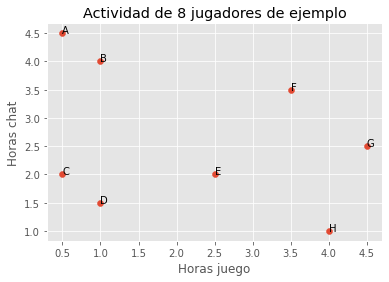

In [4]:
horas_juego = data['Horas juego']
horas_chat = data['Horas chat']

plt.scatter(horas_juego, horas_chat)

plt.title('Actividad de 8 jugadores de ejemplo')

plt.xlabel('Horas juego')
plt.ylabel('Horas chat')

for i, name in enumerate(data['Jugador']):
    plt.annotate(name, (horas_juego[i], horas_chat[i]))

plt.show()

## 1.3.2 Conceptos generales

La tarea de agrupamiento de datos es una tarea no supervisada, ya que los datos que se le proporcionan al sistema no llevan asociada ninguna etiqueta
o información añadida por un revisor humano; por el contrario, es el propio método de agrupamiento el que debe descubrir las nuevas clases o grupos a
partir de los datos recibidos.

Si bien los algoritmos de agrupamiento son utilizados como herramienta para crear recomendadores, sus aplicaciones van mucho más allá y se emplean en numerosos ámbitos, como por ejemplo:

* Procesamiento de imagen, para separar unas zonas de otras (típicamente con imágenes satelitales).

* Agrupamiento de genes relacionados con una determinada característica o patología.

* Agrupamiento automático de textos por temas.

* Definir tipos de clientes y orientar las estrategias comerciales en función de esos grupos.

* En general, definir grupos en conjuntos de datos de los que no se conoce una subdivisión previa: astronomía, física, química, biología, medicina, farmacología, economía, sociología, psicología, etc.

A menudo el agrupamiento de los datos precede a la clasificación de nuevos datos en alguno de los grupos obtenidos en el agrupamiento; por esa razón,
el agrupamiento y la clasificación de datos están estrechamente relacionados.

Los algoritmos de agrupamiento se pueden clasificar en dos tipos: los jerárquicos con progresivos, es decir que van formando grupos progresivamente y los particionales que sólo calculan una partición de los datos.

Utilizando algoritmos de agrupamiento es posible construir recomendadores basados en modelos, llamados así porque a diferencia de los recomendadores
basados en datos no necesitan almacenar todos los datos de que se dispone, sino que producen una abstracción de los datos dividiéndolos en grupos; para
producir una recomendación sólo es necesario asociar un usuario o producto a un grupo existente, por lo que la información a almacenar se reduce a la
descripción de los grupos obtenidos previamente. De esta forma la generación de una recomendación se simplifica notablemente, y por tanto los recursos requeridos para generarla.

> Más allá de los recomendadores, una de las características más importantes de los algoritmos de agrupamiento es que permiten organizar datos que en principio no se sabe o puede clasificar, evitando criterios subjetivos de clasificación, lo que produce una información muy valiosa a partir de datos desorganizados.

Una característica común a casi todos los algoritmos de agrupamiento es que no son capaces de determinar por sí mismos el número de grupos idóneo, sino
que hay que fijarlo de antemano o bien utilizar algún criterio de cohesión para saber cuándo detenerse (en el caso de los jerárquicos). En general ello requiere probar con diferentes números de grupos hasta obtener unos resultados adecuados.

## 1.3.3 Agrupamiento jerárquico.

Hay dos tipos de algoritmos de agrupamiento jerárquicos. El algoritmo aglomerativo parte de una fragmentación completa de los datos (cada dato tiene su propio grupo) y fusiona grupos progresivamente hasta alcanzar la situación contraria: todos los datos están reunidos en un único grupo. El algoritmo divisivo, por su parte, procede de la forma opuesta: parte de un único grupo que contiene todos los datos y lo va dividiendo progresivamente hasta tener un grupo para cada dato.

En los algoritmos jerárquicos de agrupamiento, se parte del estado inicial y se aplica un criterio para decidir qué grupos unir o separar en cada paso, hasta que se alcance el estado final. Si bien conceptualmente ambos tipos de algoritmos jerárquicos (aglomerativo y divisivo) son equivalentes, en la práctica el algoritmo aglomerativo es más sencillo de diseñar por la razón de que sólo hay una forma de unir dos conjuntos, pero hay muchas formas de dividir un conjunto de más de dos elementos.

### Criterios de enlace

En cada paso de un algoritmo de agrupamiento jerárquico hay que decidir qué grupos unir (o dividir). Para ello hay que determinar qué grupos están
más cercanos, o bien qué grupo está menos cohesionado. Supongamos que estamos programando un algoritmo aglomerativo; la distancia entre dos grupos puede determinarse según diferentes expresiones, que reciben el nombre de **criterios de enlace**.

Algunos de los criterios más utilizados para medir la distancia entre dos grupos $A$ y $B$ son los siguientes:

* Distancia máxima entre elementos de los grupos (enlace completo):

$$max\{d(x,y) : x \in A, y \in B \}$$

* Distancia mínima entre elementos de los grupos (enlace simple):

$$min\{d(x,y) : x \in A, y \in B \}$$

* Distancia media entre elementos de los grupos (enlace medio):

$$\frac{1}{{\left | A \right |}{\left | B \right |}}\sum_{x\in{A}}\sum_{y\in{B}} d(x,y)$$

Una desventaja del criterio de enlace simple es que puede provocar que un único elemento fuerce la unión de todo su conjunto con otro conjunto que, por lo demás, no sea especialmente cercano. Por esa razón en general se preferirán otros criterios (completo, medio u otros).

In [5]:
from math import sqrt

In [6]:
def distEuclidea(v1: list, v2: list) -> float:
    """Calcula la distancia euclídea entre dos vectores"""
       
    return sqrt(
        sum(
            pow(x - y, 2) for x, y in zip(v1, v2)
        )
    )

In [7]:
 def completeLink(points: list, g1: list, g2: list, dist = distEuclidea) -> float:
    """
        Calcula el enlace completo (máximo) entre dos grupos
        Distancia máxima entre dos puntos de cada grupo
    """
        
    dmax = 0.0
        
    for p1 in g1:
        for p2 in g2:
            d = dist(points[p1], points[p2])
            if d > dmax:
                dmax = d
                    
    return dmax

In [8]:
def simpleLink(points: list, g1: list, g2: list, dist = distEuclidea) -> float:
    """
        Calcula el enlace simple (mínimo) entre dos grupos
        Distancia mínima entre dos puntos de cada grupo
    """
    dmin = float('inf')
    
    for p1 in g1:
        for p2 in g2:
            d = dist(points[p1], points[p2])
            if d < dmin:
                dmin = d
                
    return dmin

La función `joinGroups` toma un agrupamiento, selecciona los dos grupos más cercanos según el criterio indicado y los fusiona`

In [9]:
def joinGroups(
    points: list, groups: dict, criterion = completeLink, dist = distEuclidea
):
    """
        Dado un conjunto de puntos y un agrupamiento, fusiona los dos grupos más cercanos
        con el criterio indicado.
        [groups] debe contener al menos dos grupos, y vuelve modificado,
        con los grupos elegidos fusionados
    """
    
    if len(groups) < 2:
        return
    
    # Busca el par de grupos más adecuado
    # (valor mínimo del criterio utilizado)
    dmin = float('inf')
    names = list(groups.keys())
    
    for i in range(len(names) - 1):
        for j in range(i+1, len(names)):
            d = criterion(points, groups[names[i]], groups[names[j]], dist)
            
            if d < dmin:
                dmin = d
                candidate = (names[i], names[j])
                
    # El nombre del nuevo grupo será el más bajo de los dos
    nameGroup = min(candidate)
    deleteGroup = max(candidate)
    
    # Fusionar los dos grupos:
    # Añade los elementos a uno de ellos y elimina el otro del diccionario
    groups[nameGroup].extend(groups[deleteGroup])
    del(groups[deleteGroup])

La función `agglomerativeClustering` recibe un grupo inicial donde cada punto corresponde a un grupo y los va fusionando hasta que sólo quedan `n` grupos; en cada fusión muestra el agrupamiento resultante.

In [10]:
def agglomerativeClustering(n: int, points: list, groups: dict, criterion = completeLink, dist = distEuclidea):
    """
        Agrupamiento jerárquico aglomerativo: fusiona grupos hasta obtener n grupos.
    """
    
    # Generación del agrupamiento inicial (cada punto en un grupo)
   
    print('Grupo inicial')
    print(groups)
    
    i = 0
    
    # Fusionar grupos hasta conseguir n grupos
    while len(groups) > n:
        i += 1
        joinGroups(points, groups, criterion, dist)
        print(f'\nIteración {i}')
        print(groups)

In [11]:
points = [(row['Horas juego'], row['Horas chat']) for row in data.iloc]
groups1 = { row['Jugador']: [i] for i, row in enumerate(data.iloc) }
groups3 = { row['Jugador']: [i] for i, row in enumerate(data.iloc) }

In [12]:
agglomerativeClustering(1, points, groups1)

Grupo inicial
{'A': [0], 'B': [1], 'C': [2], 'D': [3], 'E': [4], 'F': [5], 'G': [6], 'H': [7]}

Iteración 1
{'A': [0, 1], 'C': [2], 'D': [3], 'E': [4], 'F': [5], 'G': [6], 'H': [7]}

Iteración 2
{'A': [0, 1], 'C': [2, 3], 'E': [4], 'F': [5], 'G': [6], 'H': [7]}

Iteración 3
{'A': [0, 1], 'C': [2, 3], 'E': [4], 'F': [5, 6], 'H': [7]}

Iteración 4
{'A': [0, 1], 'C': [2, 3], 'E': [4, 7], 'F': [5, 6]}

Iteración 5
{'A': [0, 1], 'C': [2, 3], 'E': [4, 7, 5, 6]}

Iteración 6
{'A': [0, 1, 2, 3], 'E': [4, 7, 5, 6]}

Iteración 7
{'A': [0, 1, 2, 3, 4, 7, 5, 6]}


In [13]:
agglomerativeClustering(3, points, groups3)

Grupo inicial
{'A': [0], 'B': [1], 'C': [2], 'D': [3], 'E': [4], 'F': [5], 'G': [6], 'H': [7]}

Iteración 1
{'A': [0, 1], 'C': [2], 'D': [3], 'E': [4], 'F': [5], 'G': [6], 'H': [7]}

Iteración 2
{'A': [0, 1], 'C': [2, 3], 'E': [4], 'F': [5], 'G': [6], 'H': [7]}

Iteración 3
{'A': [0, 1], 'C': [2, 3], 'E': [4], 'F': [5, 6], 'H': [7]}

Iteración 4
{'A': [0, 1], 'C': [2, 3], 'E': [4, 7], 'F': [5, 6]}

Iteración 5
{'A': [0, 1], 'C': [2, 3], 'E': [4, 7, 5, 6]}


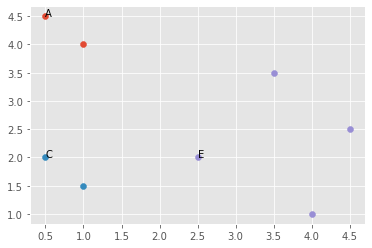

In [14]:
for group in groups3:
    plt.scatter([points[p][0] for p in groups3[group]], [points[p][1] for p in groups3[group]])
    plt.annotate(group, points[groups3[group][0]])

Una posible optimización consistiría en almacenar las distancias entre grupos para no tener que recalcularlas todas en cada fusión. En el código de ejemplo no se ha hecho así para no complicarlo por cuestiones de simple eficiencia.

### Implementación con `sklearn`

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
model = AgglomerativeClustering(n_clusters=3,  affinity='euclidean')

In [17]:
points

[(0.5, 4.5),
 (1.0, 4.0),
 (0.5, 2.0),
 (1.0, 1.5),
 (2.5, 2.0),
 (3.5, 3.5),
 (4.5, 2.5),
 (4.0, 1.0)]

In [18]:
model.fit(points)

AgglomerativeClustering(n_clusters=3)

In [19]:
model.labels_

array([2, 2, 1, 1, 0, 0, 0, 0])

In [20]:
from collections import defaultdict

In [21]:
groups = defaultdict(list)

for i, label in enumerate(model.labels_):
    groups[label].append(i)
    
groups

defaultdict(list, {2: [0, 1], 1: [2, 3], 0: [4, 5, 6, 7]})

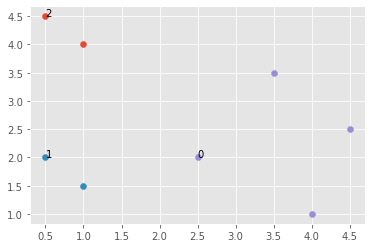

In [22]:
for group in groups:
    plt.scatter([points[p][0] for p in groups[group]], [points[p][1] for p in groups[group]])
    plt.annotate(group, points[groups[group][0]])

## Conclusiones

El principal interés de los algoritmos jerárquicos radica en que generan diferentes grados de agrupamiento, y su evolución, lo que puede ser tan útil como la obtención de un agrupamiento definitivo. Además son sencillos conceptualmente y desde el punto de vista de la programación. Por otra parte, los algoritmos jerárquicos de agrupamiento actúan de forma voraz (greedy), ya que en cada paso toman la mejor decisión en ese momento, sin tener en cuenta la futura conveniencia de tal decisión. Por ese motivo, en general dan peor resultado que otros algoritmos de agrupamiento.